In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\ytrso\Downloads\Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [5]:
#create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [6]:
X=pd.concat([X,geography,gender],axis=1)

In [7]:
#Drop unnecessary columns
X=X.drop(["Geography","Gender"],axis=1)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [12]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [13]:
X_test.shape

(2000, 11)

In [14]:
# importing the keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [15]:
#initialize the ANN
classifier=Sequential()

In [16]:
#Adding the input layer and first hidden layer
classifier.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu",input_dim=11))

In [17]:
#Adding the second hidden layer
classifier.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu"))

In [18]:
# Adding the outpyut layer
classifier.add(Dense(units=1,kernel_initializer="glorot_uniform",activation="sigmoid"))

In [19]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
#Compiling the ANN
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [21]:
#Fitting the ANN to teh training dataset
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=20)

Epoch 1/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6030 - loss: 0.8214 - val_accuracy: 0.7895 - val_loss: 0.5098
Epoch 2/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8101 - loss: 0.4762 - val_accuracy: 0.8118 - val_loss: 0.4577
Epoch 3/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8185 - loss: 0.4382 - val_accuracy: 0.8171 - val_loss: 0.4297
Epoch 4/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8195 - loss: 0.4176 - val_accuracy: 0.8296 - val_loss: 0.4108
Epoch 5/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8345 - loss: 0.3974 - val_accuracy: 0.8345 - val_loss: 0.3997
Epoch 6/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8427 - loss: 0.3802 - val_accuracy: 0.8357 - val_loss: 0.3931
Epoch 7/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8345 - loss: 0.3935 - val_accuracy: 0.8368 - val_loss: 0.3896
Epoch 8/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8368 - loss: 0.3869 - val_accuracy: 0.

In [43]:
# Save the model
classifier.save("classification_model.h5")  # Saves as an HDF5 file

In [51]:
# Load the saved model
from tensorflow.keras.models import load_model
loaded_model = load_model("classification_model.h5")
#Compiling the ANN
loaded_model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


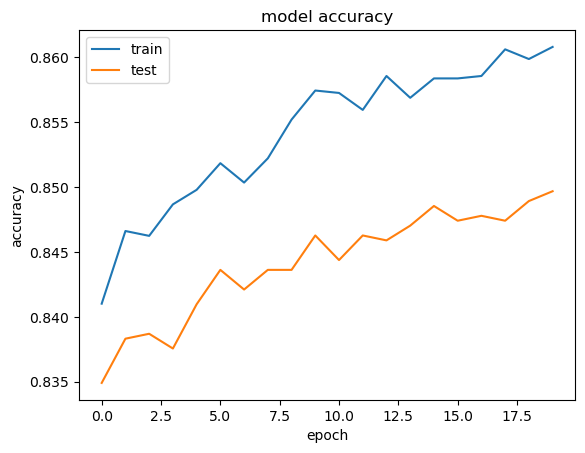

In [55]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

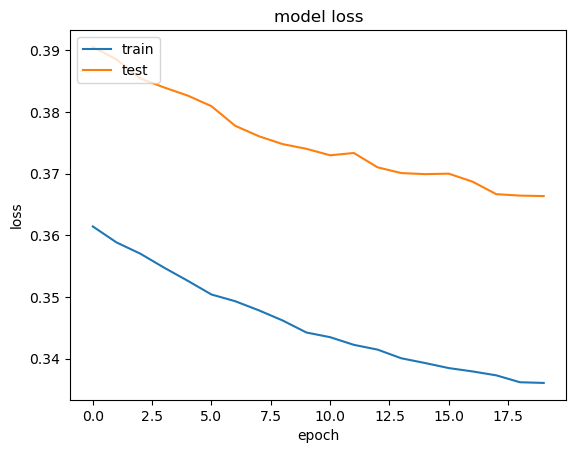

In [57]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = loaded_model.predict(X_test)
y_pred = (y_pred > 0.5)



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [55]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1516,   79],
       [ 216,  189]], dtype=int64)

In [57]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8525

In [ ]:
# Evaluate the model and write the results to a file
loss, accuracy = loaded_model.evaluate(features_test, target_test)
with open('./reports/model_metrics.txt', 'w') as f:
    f.write(f"Test Loss: {loss:.4f}\n")
    f.write(f"Test Accuracy: {accuracy:.4f}\n")